# Analisi investimento immobiliare

In [2]:
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd
from modulo_investimento import ProgettoImmobiliare

## Input di esempio

In [3]:

params = dict(
    prezzo_appartamento=199_000,
    quota_mutuo=0.80,
    tasso_annuo_mutuo=0.03,
    affitto_mensile_stimato=1_500,
    aliquota_tasse=0.21,
    durata_prestito_anni=20,
    durata_progetto_anni=50,
    modalita_prestito="rata_fissa",
    pagamenti_per_anno=12,
    tasso_attualizzazione_annuo=0.1
)
# quota_capitale_fissa o rata_fissa

proj = ProgettoImmobiliare(**params)
cf, det = proj.calcola_flussi()
df = proj.dataframe()
df.head()


,mese,affitto,rata,interessi,capitale,residuo,tasse,pre_tasse,cf_netto
0,0,0.0,0.000000,0.000000,0.000000,159200.000000,0.0,0.000000,-39800.000000
1,1,1500.0,882.919376,398.000000,484.919376,158715.080624,0.0,617.080624,617.080624
2,2,1500.0,882.919376,396.787702,486.131674,158228.948950,0.0,617.080624,617.080624
3,3,1500.0,882.919376,395.572372,487.347003,157741.601947,0.0,617.080624,617.080624
4,4,1500.0,882.919376,394.354005,488.565371,157253.036576,0.0,617.080624,617.080624


## Grafico interattivo (Plotly)

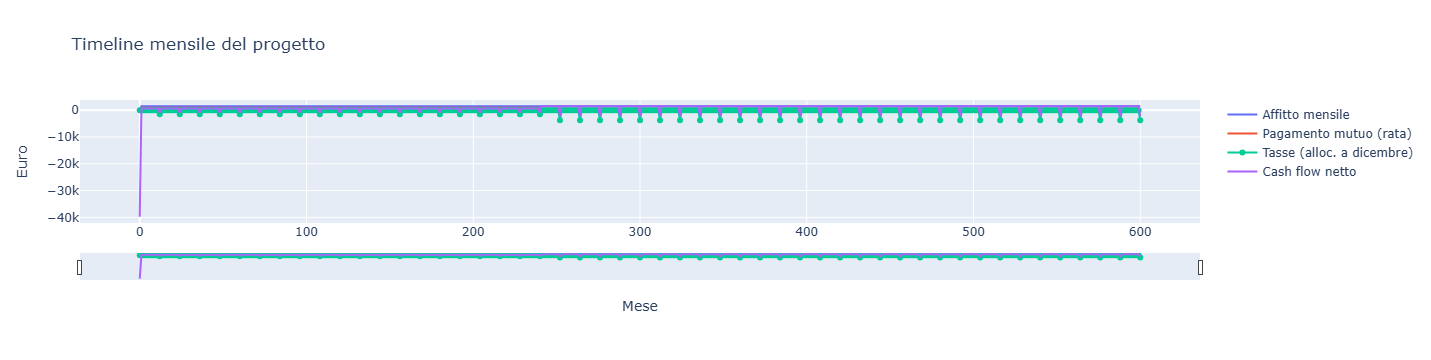

In [6]:

# Tracce principali: affitto, rata (pagamento mutuo), tasse, cash flow netto
x = df["mese"]
fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=df["affitto"], mode="lines", name="Affitto mensile",
                         hovertemplate="Mese %{x}<br>Affitto: %{y:.2f} €<extra></extra>"))
fig.add_trace(go.Scatter(x=x, y=df["rata"], mode="lines", name="Pagamento mutuo (rata)",
                         hovertemplate="Mese %{x}<br>Rata: %{y:.2f} €<extra></extra>"))
fig.add_trace(go.Scatter(x=x, y=df["tasse"], mode="markers+lines", name="Tasse (alloc. a dicembre)",
                         hovertemplate="Mese %{x}<br>Tasse: %{y:.2f} €<extra></extra>"))
fig.add_trace(go.Scatter(x=x, y=df["cf_netto"], mode="lines", name="Cash flow netto",
                         hovertemplate="Mese %{x}<br>CF netto: %{y:.2f} €<extra></extra>"))

# Range slider/selector e zoom abilitati di default
fig.update_layout(
    title="Timeline mensile del progetto",
    xaxis_title="Mese",
    yaxis_title="Euro",
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=12, label="1y", step="month", stepmode="backward"),
                dict(count=60, label="5y", step="month", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="linear",
    ),
    hovermode="x unified"
)

fig.show()


## VAN e riepilogo

In [5]:

summary = proj.riassunto()
summary


{'equity_iniziale': 39799.99999999999,
 'totale_affitti_incassati': 900000,
 'totale_rate_pagati': 211900.65018802637,
 'totale_tasse_pagate': 144500.86346051452,
 'VAN': 33905.369298646125,
 'durata_progetto_mesi': 600,
 'durata_prestito_mesi': 240}